In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import sys
sys.path.insert(1,"../")
from visualize import plot_grid_search,plot_grid_search_test,filter_df,filter_df_test,get_concat_losses,get_inputs_linreg
from statistics import student_test

## Visualizations for images

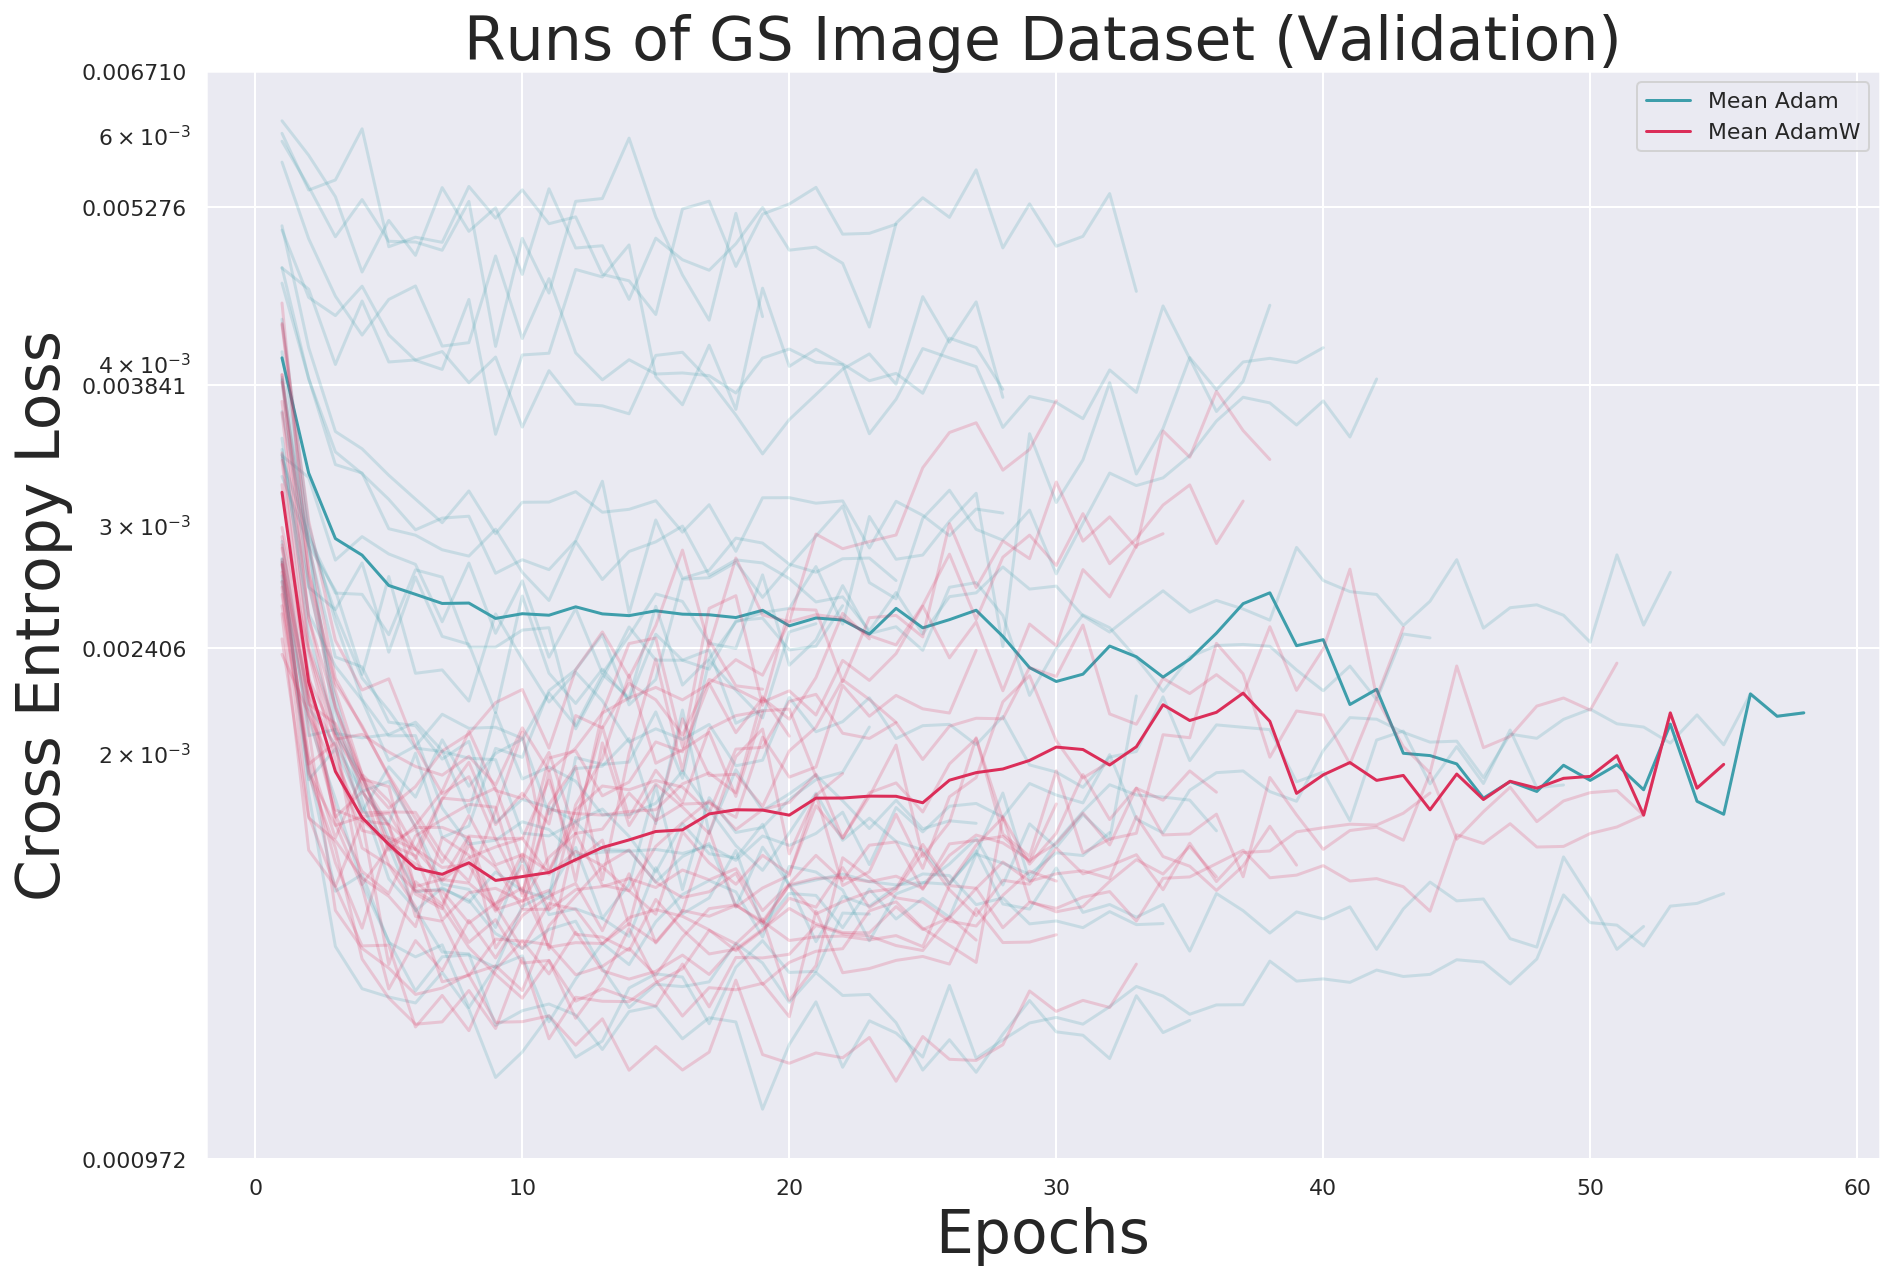

In [16]:
df = pd.read_json("../../log/log_images_results.json")
df = filter_df(df)
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search(df,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of GS Image Dataset (Validation)", fontsize=30)
ax.set_ylabel('Cross Entropy Loss', fontsize=30)
ax.set_xlabel('Epochs', fontsize=30)
fig.savefig("../../results/images_gridsearch_val.png", fontsize=30)

## Statistics test

In [13]:
adam_df = df[df.optimizer == 'Adam']
adamW_df = df[df.optimizer == 'AdamW']
sgd_df = df[df.optimizer == 'SGD']
train = False
adam_concat_losses = get_concat_losses(adam_df,train)
adamW_concat_losses = get_concat_losses(adamW_df,train)
sgd_concat_losses = get_concat_losses(sgd_df,train)

x_adam, y_adam= get_inputs_linreg(adam_concat_losses)
x_adamw, y_adamw = get_inputs_linreg(sgd_concat_losses)
student_test(x_adam,y_adam,x_adamw,y_adamw)

0.0

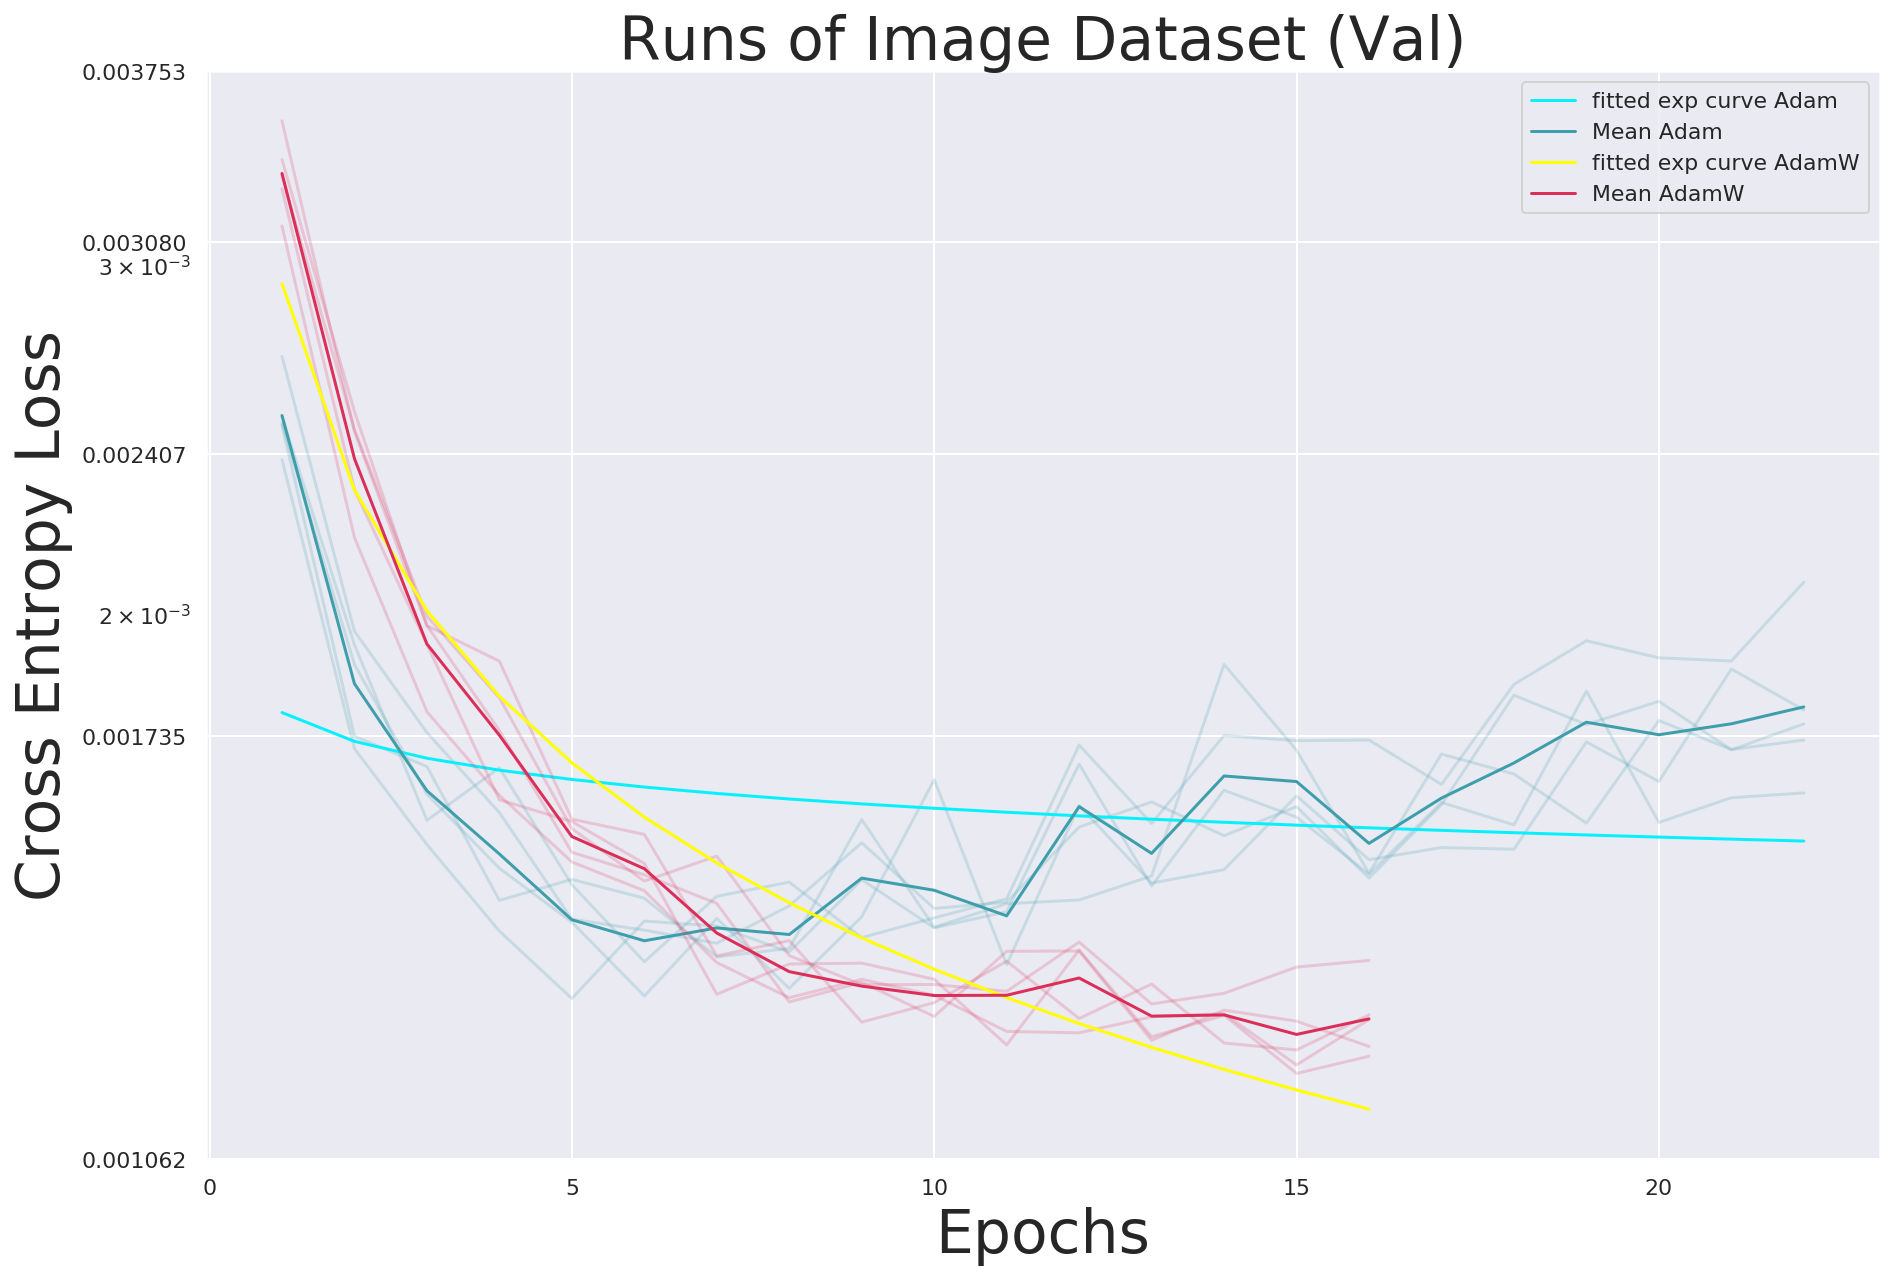

In [13]:
#plt.rcParams.update({'axes.titlesize': 'large'})

df = pd.read_json("../../log/log_images_results.json")
df = filter_df_test(df)
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search_test(df,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=True,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of Image Dataset (Val)", fontsize=30)
ax.set_ylabel('Cross Entropy Loss', fontsize=30)
ax.set_xlabel('Epochs', fontsize=30)
fig.savefig("../../results/test_images_val.png")

# Text

ValueError: max() arg is an empty sequence

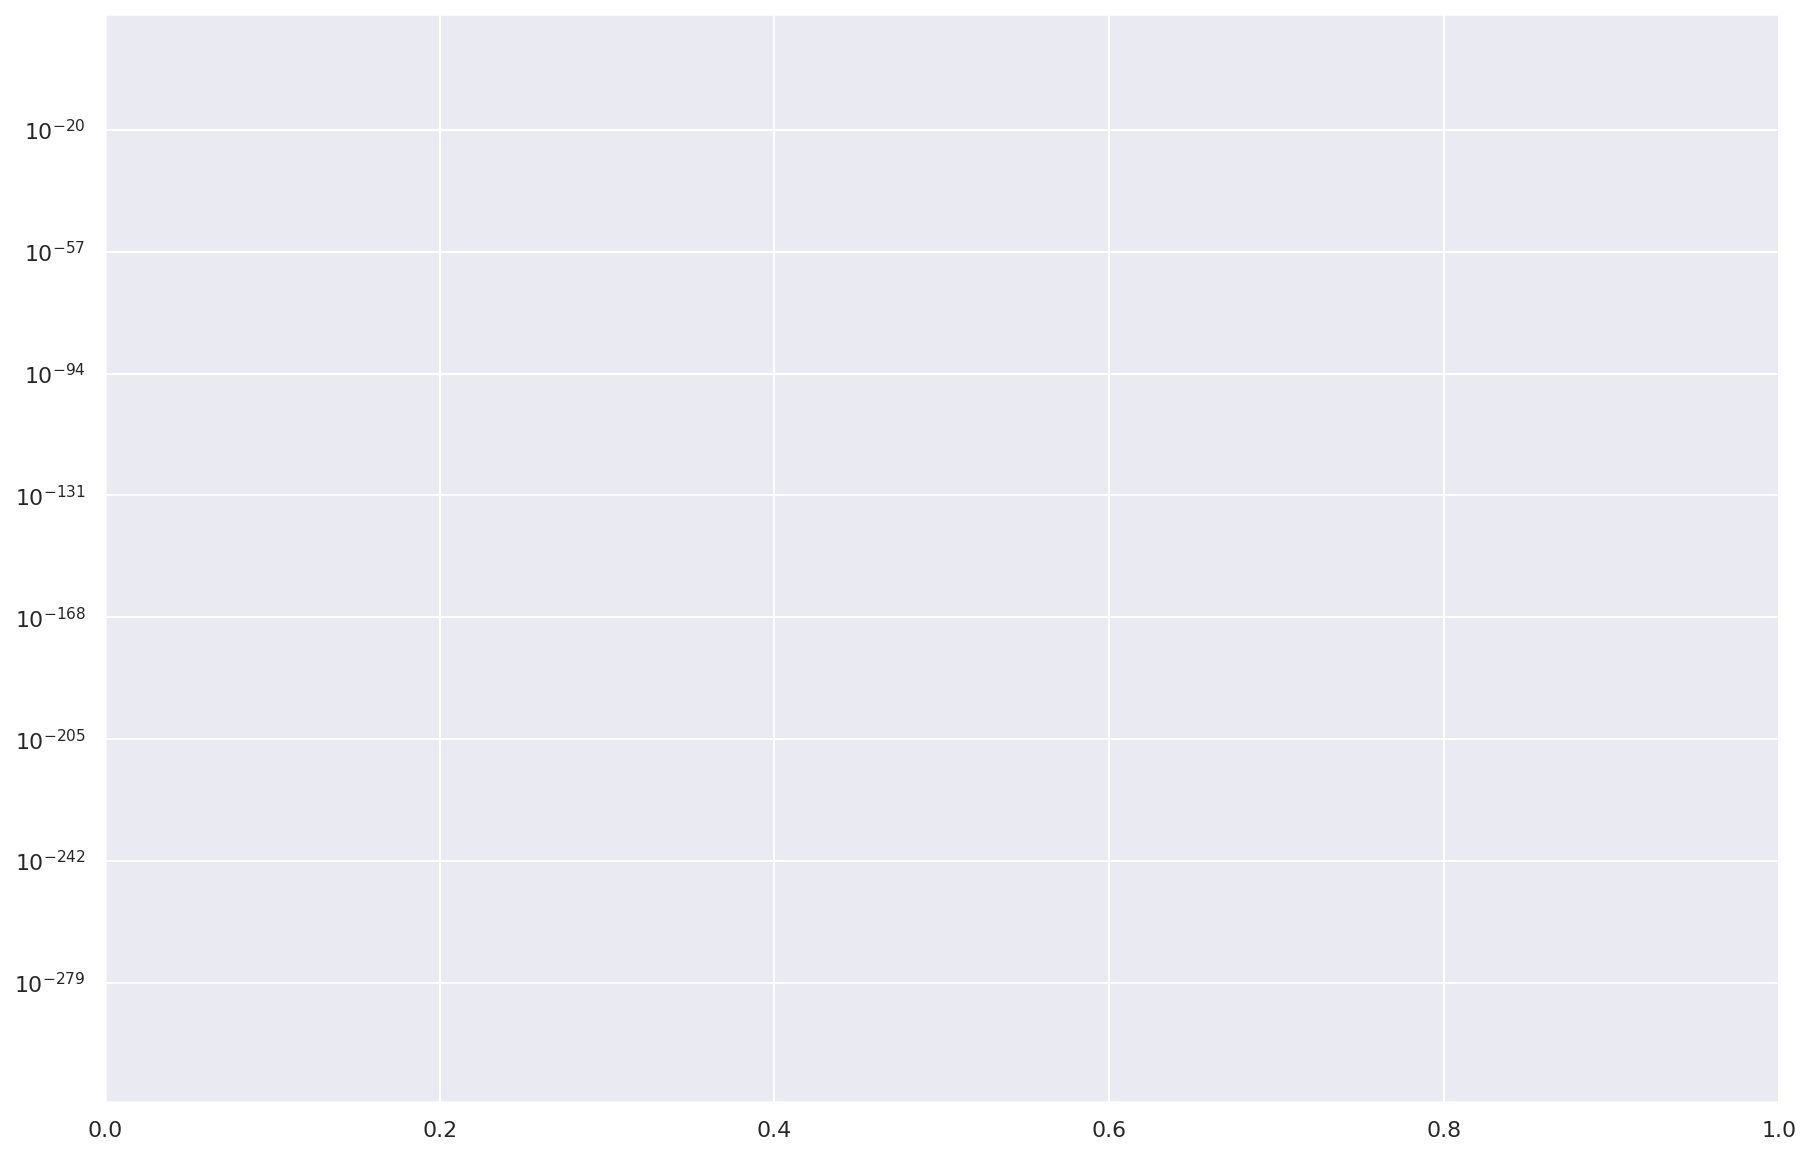

In [17]:
df = pd.read_json("../../log/log_text_results.json")
df = filter_df(df)
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search(df,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of GS Text Dataset (Validation)", fontsize=30)
ax.set_ylabel('Cross Entropy Loss', fontsize=30)
ax.set_xlabel('Epochs', fontsize=30)
fig.savefig("../../results/text_gridsearch_val.png")

In [ ]:
df = pd.read_json("../../log/log_text_results.json")
df = filter_df_test(df)
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search_test(df,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=True,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of Text Dataset (Val)", fontsize=30)
ax.set_ylabel('Cross Entropy Loss', fontsize=30)
ax.set_xlabel('Epochs', fontsize=30)
fig.savefig("../../results/test_text_val.png")

# 

In [ ]:
df = pd.read_json("../../log/log_text_results.json")
df = filter_df(df)
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search(df,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of GS Text Dataset (Validation)")
fig.savefig("../../results/text_gridsearch_val.png")

In [ ]:
plt.rcParams.update({'axes.titlesize': 'large'})
df = pd.read_json("../../log/log_text_results.json")
df = filter_df_test(df)
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search_test(df,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=True,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of Text Dataset (Val)")
fig.savefig("../../results/test_text_val.png")